# Week 2
## Dummy Variables in Linear Regression
### 1. Single Dummy Variable

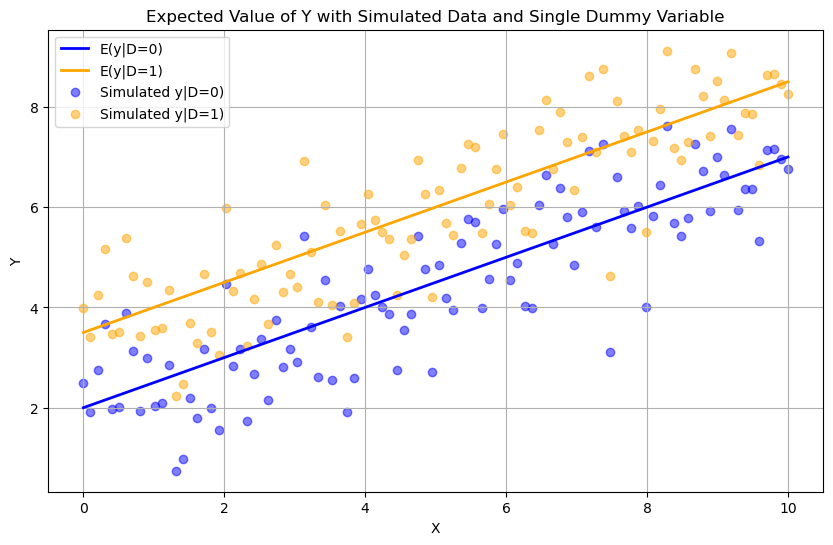

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta_0 = 2
beta_1 = 0.5
beta_2 = 1.5
np.random.seed(42) # For reproducibility

# Generate X values
X = np.linspace(0, 10, 100)

# Expected values 
# Equation: beta_0 + beta_1 * X + beta_2 * Di
E_y_D0 = beta_0 + beta_1 * X # Dummy variable = 0
E_y_D1 = beta_0 + beta_1 * X + beta_2 # Dummy variable = 1

# Simulate y values by adding noise
noise = np.random.normal(0, 1, size = len(X)) # Random noise with mean 0 and standard deviation 1
y_D0 = E_y_D0 + noise
y_D1 = E_y_D1 + noise

# Plot
plt.figure(figsize = (10,6))

# Plot expected values
plt.plot(X, E_y_D0, label='E(y|D=0)', color='blue', linewidth=2)
plt.plot(X, E_y_D1, label='E(y|D=1)', color='orange', linewidth=2)

# Plot simulated data
plt.scatter(X, y_D0, color='blue', alpha=0.5, label='Simulated y|D=0')
plt.scatter(X, y_D1, color='orange', alpha=0.5, label='Simulated y|D=1')

# Labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Expected Value of Y with Simulated Data and Single Dummy Variable')
plt.legend()
plt.grid(True)

###  Interaction Between Dummy and Continuous Variable

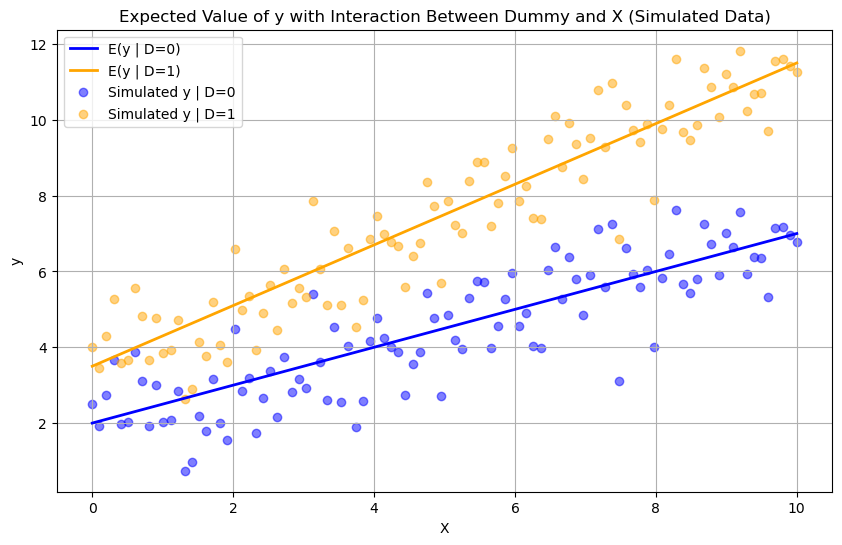

In [14]:
# Parameters
beta_0 = 2
beta_1 = 0.5
beta_2 = 1.5
beta_3 = 0.3

np.random.seed(42) # For reproducibility

# Generate X values
X = np.linspace(0, 10, 100)

# Expected values
E_y_D0 = beta_0 + beta_1 * X
E_y_D1 = beta_0 + (beta_1 + beta_3) * X + beta_2

# Simulate y values by adding noise
noise = np.random.normal(0, 1, size=len(X)) # Random noise with mean 0 a standard deviation 1
y_D0 = E_y_D0 + noise
y_D1 = E_y_D1 + noise

# Plot
plt.figure(figsize=(10, 6))

# Plot expected values
plt.plot(X, E_y_D0, label='E(y | D=0)', color='blue', linewidth=2)
plt.plot(X, E_y_D1, label='E(y | D=1)', color='orange', linewidth=2)

# Plot simulated data
plt.scatter(X, y_D0, color='blue', alpha=0.5, label='Simulated y | D=0')
plt.scatter(X, y_D1, color='orange', alpha=0.5, label='Simulated y | D=1')

# Labels and Title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Expected Value of y with Interaction Between Dummy and X (Simulated Data)')
plt.legend()
plt.grid(True)
# Show the plot
plt.show()

### Creating Dummy Variables in Python

#### 1. Manually creating dummy variables.

Form a dataframe about storage categories.

In [21]:
import pandas as pd

storage_categories = ['16GB', '32GB', '64GB', '238GB', '256GB']

np.random.seed(42)

sample_size = 100
data = {
    'observation': range(1, sample_size + 1),
    'category': np.random.choice(storage_categories, size=sample_size)
}

df = pd.DataFrame(data)
df

,observation,category
0,1,238GB
1,2,256GB
2,3,64GB
3,4,256GB
4,5,256GB
...,...,...
95,96,64GB
96,97,256GB
97,98,32GB
98,99,32GB


Convert the categories into dummy variables and form a dataframe 'df_dummies' 

In [39]:
# Copy the dataframe to form a dataframe with dummy variables
df_dummies = df.copy()

for category in storage_categories:
    # where 함수
    # 각 category column 이 실제 category 와 매치하면 1, 아니면 0 을 df_dummies[category] 에 삽입
    df_dummies[category] = np.where(df_dummies['category']==category, 1, 0)

df_dummies

,observation,category,16GB,32GB,64GB,238GB,256GB
0,1,238GB,0,0,0,1,0
1,2,256GB,0,0,0,0,1
2,3,64GB,0,0,1,0,0
3,4,256GB,0,0,0,0,1
4,5,256GB,0,0,0,0,1
...,...,...,...,...,...,...,...
95,96,64GB,0,0,1,0,0
96,97,256GB,0,0,0,0,1
97,98,32GB,0,1,0,0,0
98,99,32GB,0,1,0,0,0


#### 2. Creating dummy variables using 'get_dummies' function in pandas
No need to use for loop

In [48]:
# df: 대상 dataframe
# Dummy variable 대상 column = 'category'
# prefix: 접두사
df_dummies = pd.get_dummies(df, columns=['category'], prefix='', prefix_sep='').astype(int)
df_dummies

,observation,16GB,238GB,256GB,32GB,64GB
0,1,0,1,0,0,0
1,2,0,0,1,0,0
2,3,0,0,0,0,1
3,4,0,0,1,0,0
4,5,0,0,1,0,0
...,...,...,...,...,...,...
95,96,0,0,0,0,1
96,97,0,0,1,0,0
97,98,0,0,0,1,0
98,99,0,0,0,1,0


#### 3. Using OneHotEncoder from sklearn library

In [63]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'category' column (0 1 0 0 0 이런 식의 rows 생성)
encoded_categories = encoder.fit_transform(df[['category']])

# Create a DataFrame for the encoded columns with category names (카테고리 이름 칼럼 추가)
encoded_df = pd.DataFrame(encoded_categories, columns=encoder.categories_[0])

# Concatenate the encoded DataFrame with the original DataFrame (without the original 'category' column)
# 두 테이블 병합
df_encoded = pd.concat([df.drop(columns=['category']), encoded_df], axis=1)

df_encoded

,observation,16GB,238GB,256GB,32GB,64GB
0,1,0.0,1.0,0.0,0.0,0.0
1,2,0.0,0.0,1.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,1.0
3,4,0.0,0.0,1.0,0.0,0.0
4,5,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
95,96,0.0,0.0,0.0,0.0,1.0
96,97,0.0,0.0,1.0,0.0,0.0
97,98,0.0,0.0,0.0,1.0,0.0
98,99,0.0,0.0,0.0,1.0,0.0


#### 4. Using TensorFlow library

In [105]:
import tensorflow as tf

category_to_int = {category: idx for idx, category in enumerate(storage_categories)}
df['category_int'] = df['category'].map(category_to_int)

one_hot_encoded = tf.one_hot(df['category_int'], depth=len(storage_categories))
                             
one_hot_encoded_np = one_hot_encoded.numpy()

encoded_df = pd.DataFrame(one_hot_encoded_np, columns=storage_categories)

df_encoded = pd.concat([df.drop(columns=['category', 'category_int']), encoded_df], axis=1)

df_encoded

,observation,16GB,32GB,64GB,238GB,256GB
0,1,0.0,0.0,0.0,1.0,0.0
1,2,0.0,0.0,0.0,0.0,1.0
2,3,0.0,0.0,1.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,1.0
4,5,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
95,96,0.0,0.0,1.0,0.0,0.0
96,97,0.0,0.0,0.0,0.0,1.0
97,98,0.0,1.0,0.0,0.0,0.0
98,99,0.0,1.0,0.0,0.0,0.0


### Assignment 3

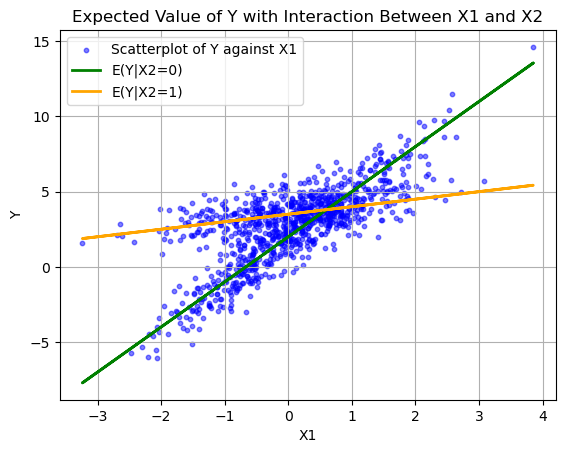

In [91]:
np.random.seed(42)

n = 1000

X1 = np.random.normal(loc=0, scale=1, size=n)
X2 = np.random.binomial(n=1, p=0.5, size=n)
X1_X2 = X1 * X2

beta_0 = 2.0 # Intercept
beta_1 = 3.0 # Coefficient for X1
beta_2 = 1.5 # Coefficient for X2
beta_3 = -2.5 # Coefficient for X1*X2 interaction

epsilon = np.random.normal(loc=0, scale=1, size=n)

Y = beta_0 + beta_1 * X1 + beta_2 * X2 + beta_3 * X1_X2 + epsilon

data = pd.DataFrame({
'Y': Y,
'X1': X1,
'X2': X2,
'Error': epsilon
})

# Plot simulated data
plt.scatter(X1, Y, color='blue', alpha=0.5, label='Scatterplot of Y against X1', s=10)

# Expected values
E_Y_X20 = beta_0 + beta_1 * X1
E_Y_X21 = beta_0 + (beta_1 + beta_3) * X1 + beta_2

# Plot expected values
plt.plot(X1, E_Y_X20, label='E(Y|X2=0)', color='green', linewidth=2)
plt.plot(X1, E_Y_X21, label='E(Y|X2=1)', color='orange', linewidth=2)

# Labels and Title
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Expected Value of Y with Interaction Between X1 and X2')
plt.legend()
plt.grid(True)
# Show the plot
plt.show()

## Variable Transformations
Nonlinear relationships can be modeled by appropriate transformations
### Log-log transformation (Assignment 5)


In [7]:
import math
import numpy as np
import pandas as pd

# 0. Create a function for log transformation
def log_trans(log_x):
    log_y = 0.02 + 1.5 * log_x
    y = math.exp(log_y)
    x = math.exp(log_x)
    return y, log_y, x

# 1. Create a dataframe of y, log_y, and x
log_x_values = np.linspace(-0.9, 0.9, 1000)

data1 = []

for log_x in log_x_values:
    y, log_y, x = log_trans(log_x)
    data1.append({
        'log(xi1)': log_x,
        'xi1': x,
        'log(yi)': log_y,
        'yi': y
    })

df1 = pd.DataFrame(data1)
df1

,log(xi1),xi1,log(yi),yi
0,-0.900000,0.406570,-1.330000,0.264477
1,-0.898198,0.407303,-1.327297,0.265193
2,-0.896396,0.408037,-1.324595,0.265911
3,-0.894595,0.408773,-1.321892,0.266630
4,-0.892793,0.409510,-1.319189,0.267352
...,...,...,...,...
995,0.892793,2.441940,1.359189,3.893036
996,0.894595,2.446344,1.361892,3.903571
997,0.896396,2.450756,1.364595,3.914136
998,0.898198,2.455175,1.367297,3.924729


In [9]:
# 2. Compute the difference between 'log(yi)-log(yi-1)' and 'log(xi)-log(xi-1)'

df2 = df1[['log(xi1)', 'log(yi)']].copy()

## Add i = 1000 value to the DataFrame
log_x_1001 = 0.9001
y_1001, log_y_1001, x_1001 = log_trans(log_x_1001)
df2.loc[len(df2)] = [log_x_1001, log_y_1001]

## Compute the differences
df2['log(yi) - log(yi-1)'] = df2['log(yi)'].diff() 
df2['log(xi) - log(xi-1)'] = df2['log(xi1)'].diff() 
df2['ratio of diff'] = df2['log(yi) - log(yi-1)'] / df2['log(xi) - log(xi-1)']

## Drop i = 0 value from the DataFrame
df2 = df2.drop(index = 0)

print('Minimum: ', min(df2['ratio of diff']))
print('Average: ', sum(df2['ratio of diff']) / len(df2['ratio of diff']))
print('Maximum: ', max(df2['ratio of diff']))

df2

Minimum:  1.4999999999988898
Average:  1.499999999999999
Maximum:  1.5000000000001232


,log(xi1),log(yi),log(yi) - log(yi-1),log(xi) - log(xi-1),ratio of diff
1,-0.898198,-1.327297,0.002703,0.001802,1.5
2,-0.896396,-1.324595,0.002703,0.001802,1.5
3,-0.894595,-1.321892,0.002703,0.001802,1.5
4,-0.892793,-1.319189,0.002703,0.001802,1.5
5,-0.890991,-1.316486,0.002703,0.001802,1.5
...,...,...,...,...,...
996,0.894595,1.361892,0.002703,0.001802,1.5
997,0.896396,1.364595,0.002703,0.001802,1.5
998,0.898198,1.367297,0.002703,0.001802,1.5
999,0.900000,1.370000,0.002703,0.001802,1.5


In [11]:
# 3. Compute the difference between 'yi - yi-1' and 'xi - xi-1'

df3 = df1[['yi', 'xi1']].copy()

## Add i = 1000 value to the DataFrame
log_x_1001 = 0.9001
y_1001, log_y_1001, x_1001 = log_trans(log_x_1001)
df3.loc[len(df2)] = [y_1001, x_1001]

## Compute the percentage differences
df3['perc_diff_y'] = df3['yi'].pct_change() * 100
df3['perc_diff_x'] = df3['xi1'].pct_change() * 100 
df3['ratio of diff'] = df3['perc_diff_y'] / df3['perc_diff_x']

## Drop i = 0 value from the DataFrame
df3 = df3.drop(index = 0)

print('Minimum: ', min(df3['ratio of diff']))
print('Average: ', sum(df3['ratio of diff']) / len(df3['ratio of diff']))
print('Maximum: ', max(df3['ratio of diff']))

df3

Minimum:  1.5000375012510352
Average:  1.5006754430436386
Maximum:  1.50067608162431


,yi,xi1,perc_diff_y,perc_diff_x,ratio of diff
1,0.265193,0.407303,0.270636,0.180343,1.500676
2,0.265911,0.408037,0.270636,0.180343,1.500676
3,0.266630,0.408773,0.270636,0.180343,1.500676
4,0.267352,0.409510,0.270636,0.180343,1.500676
5,0.268076,0.410249,0.270636,0.180343,1.500676
...,...,...,...,...,...
996,3.903571,2.446344,0.270636,0.180343,1.500676
997,3.914136,2.450756,0.270636,0.180343,1.500676
998,3.924729,2.455175,0.270636,0.180343,1.500676
999,3.935351,2.459603,0.270636,0.180343,1.500676


In [13]:
# 4. Compute y1 and y0 if log(x0) = 0.1 and log(x1) = 0.11

log_x0 = 0.1
log_x1 = 0.11

y0, log_y0, x0 = log_trans(log_x0)
y1, log_y1, x1 = log_trans(log_x1)

p_y = ((y1 - y0) / y0) * 100
p_x = ((x1 - x0) / x0) * 100

print('Percentage difference between y1 and y0: ', p_y)
print('Percentage difference between x1 and x0: ', p_x)
print('Ratio: ', p_y / p_x)

print('Difference between log(y1) and log(y0): ', log_y1 - log_y0)
print('Difference between log(x1) and log(x0): ', log_x1 - log_x0)
print('Ratio: ', (log_y1 - log_y0) / (log_x1 - log_x0))

Percentage difference between y1 and y0:  1.511306461571897
Percentage difference between x1 and x0:  1.0050167084167971
Ratio:  1.5037625234635732
Difference between log(y1) and log(y0):  0.014999999999999986
Difference between log(x1) and log(x0):  0.009999999999999995
Ratio:  1.4999999999999993


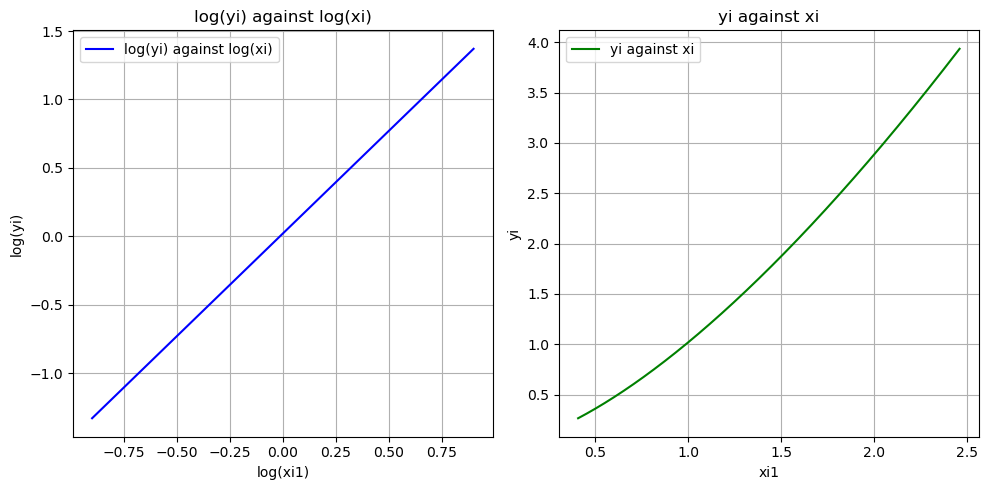

In [367]:
# 5. Plot log(yi) against log(xi), and plot yi against xi.

plt.figure(figsize=(10, 5))

## Plot log(yi) against log(xi)
plt.subplot(1, 2, 1)
plt.plot(df1['log(xi1)'], df1['log(yi)'], color='blue', label='log(yi) against log(xi)')
plt.xlabel('log(xi1)')
plt.ylabel('log(yi)')
plt.title('log(yi) against log(xi)')
plt.grid(True)
plt.legend()

## Plot yi against xi
plt.subplot(1, 2, 2)
plt.plot(df1['xi1'], df1['yi'], color='green', label='yi against xi')
plt.xlabel('xi1')
plt.ylabel('yi')
plt.title('yi against xi')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

### Assignment 6
차수가 늘어날수록 더 정교한 그래프/approximation 생성 가능.

<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
/var/folders/zr/hq5f8g3s0jq6yt_pl2ppbgmc0000gn/T/ipykernel_29595/3021905373.py:39: SyntaxWarning: invalid escape sequence '\s'
  ax1.set_title('True Function $F(x_1, x_2) = \sin(x_1) + \cos(x_2)$')


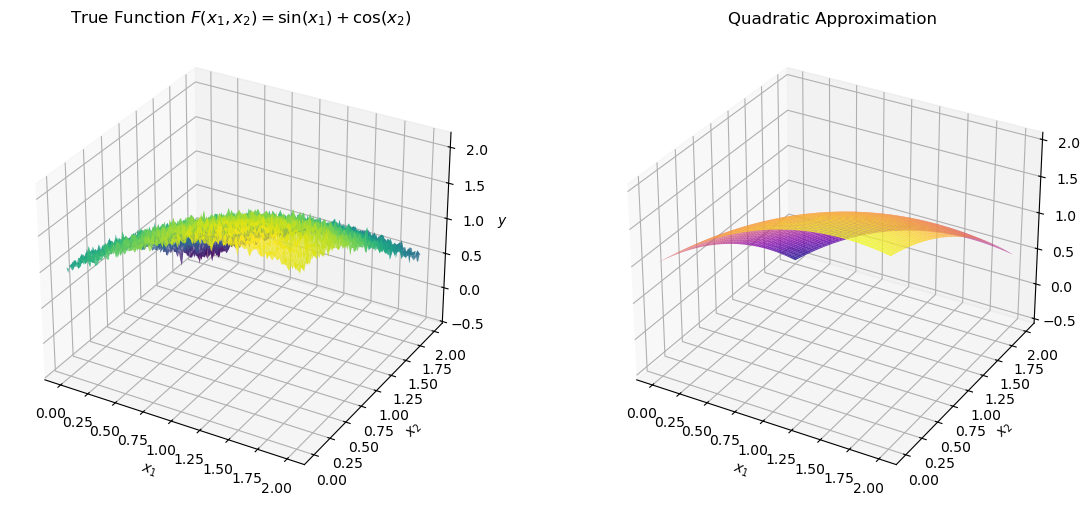

In [41]:
import matplotlib.pyplot as plt

# 0. Create a grid of values for x1 and x2.
from mpl_toolkits.mplot3d import Axes3D

# Generate data for two independent variables x1 and x2
x1 = np.linspace(0, 2, 100)
x2 = np.linspace(0, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

# 1. Create a function where ei is normally distributed with zero mean and standard deviation of 0.05.
def F(x1, x2):
    return np.sin(x1) + np.cos(x2)
    
np.random.seed(42)
noise = np.random.normal(0, 1, size=X1.shape)
Y_true = F(X1, X2) + (0.05 * noise)

# 2. Produce a surface plot of the yi true against its quadratic approximation:
b0 = 1.0118369055895795, 
b1 = 1.2651958208818797,
b2 = -0.2657272687419812, 
b3 = -0.3900744534699802,
b4 = -0.24799952558698277, 
b5 = 0.0021713571444721682
def F(x1, x2):
    return np.sin(x1) + np.cos(x2)
    
np.random.seed(42)
noise = np.random.normal(0, 1, size=X1.shape)
Y_true = F(X1, X2) + (0.05 * noise)
Y_quad_approx = b0 + b1*X1 + b2*X2 + b3*X1**2 + b4*X2**2 + b5*X1*x2

fig = plt.figure(figsize=(14, 6))

# Plot the true function F(x1, x2)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, X2, Y_true, cmap='viridis', alpha=0.8)
ax1.set_title('True Function $F(x_1, x_2) = \sin(x_1) + \cos(x_2)$')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$y$')

# Plot the quadratic approximation with optimized coefficients
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X1, X2, Y_quad_approx, cmap='plasma', alpha=0.8)
ax2.set_title('Quadratic Approximation')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$y$')

plt.show()

<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
/var/folders/zr/hq5f8g3s0jq6yt_pl2ppbgmc0000gn/T/ipykernel_29595/2874735708.py:28: SyntaxWarning: invalid escape sequence '\s'
  ax3.set_title('True Function $F(x_1, x_2) = \sin(x_1) + \cos(x_2)$ (Expanded)')


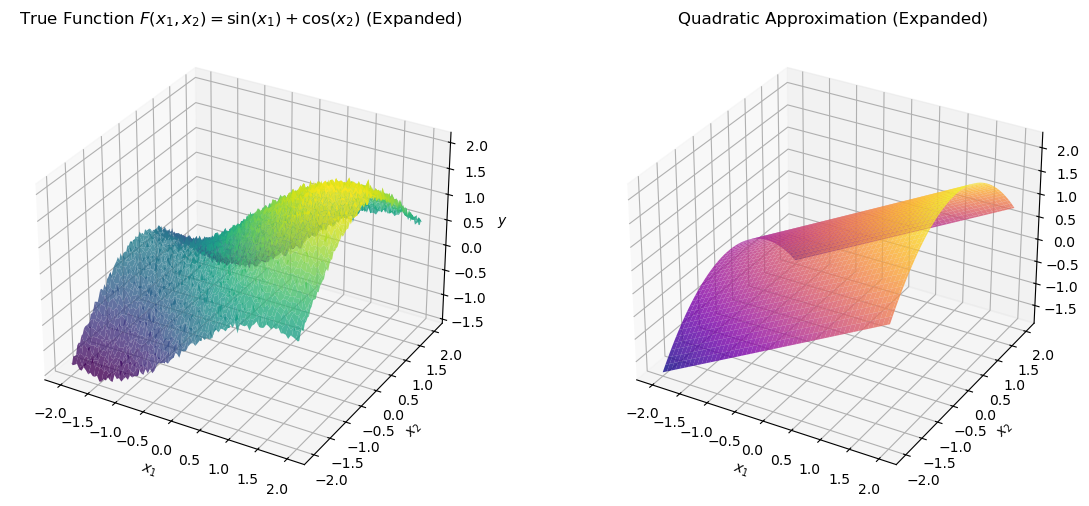

In [23]:
# 3. Expand the range of x1 and x2 to [-2, 2]
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

def F(x1, x2):
    return np.sin(x1) + np.cos(x2)
    
np.random.seed(42)
noise = np.random.normal(0, 1, size=X1.shape)
Y_true = F(X1, X2) + (0.05 * noise)

# 2. Produce a surface plot of the yi true against its quadratic approximation:
b0 = 0.947521830723164, 
b1 = 0.6471657234847527,
b2 = -0.00042564267678693867, 
b3 = 0.0002166222395619712,
b4 = -0.3690767321923572, 
b5 = 0.000542839286116905

Y_quad_approx = b0 + b1*X1 + b2*X2 + b3*X1**2 + b4*X2**2 + b5*X1*x2

fig = plt.figure(figsize=(14, 6))

# Plot the true function F(x1, x2)
ax3 = fig.add_subplot(121, projection='3d')
ax3.plot_surface(X1, X2, Y_true, cmap='viridis', alpha=0.8)
ax3.set_title('True Function $F(x_1, x_2) = \sin(x_1) + \cos(x_2)$ (Expanded)')
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.set_zlabel('$y$')

# Plot the quadratic approximation with optimized coefficients
ax4 = fig.add_subplot(122, projection='3d')
ax4.plot_surface(X1, X2, Y_quad_approx, cmap='plasma', alpha=0.8)
ax4.set_title('Quadratic Approximation (Expanded)')
ax4.set_xlabel('$x_1$')
ax4.set_ylabel('$x_2$')
ax4.set_zlabel('$y$')

plt.show()

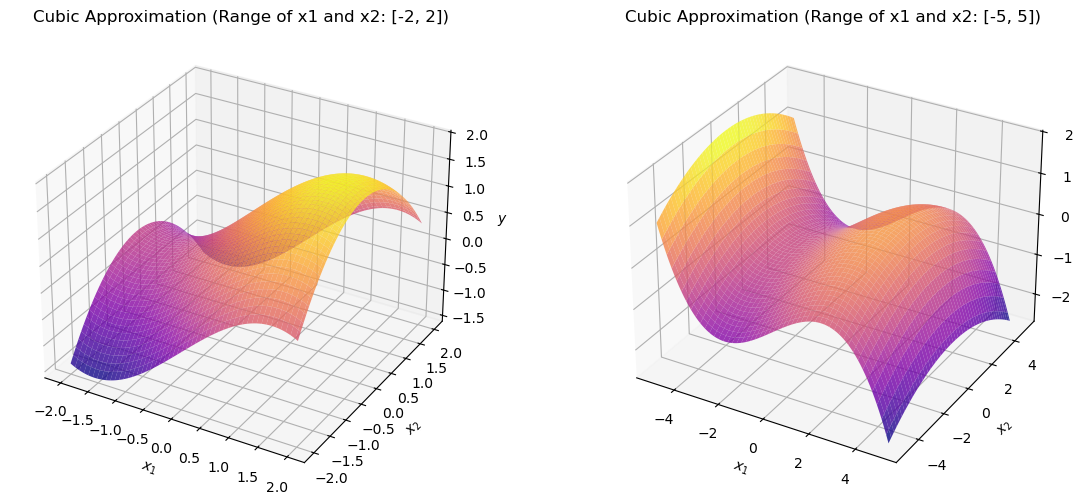

In [35]:
# 4. Add the cubic terms
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

b0 = 0.9475218307231639
b1 = 0.97037252379979
b2 = -0.00013220723016898084
b3 = 0.00021662223956205273
b4 = -0.36907673219235687
b5 = 0.0005428392861181945
b6 = -0.13191604076891805
b7 = -1.5804134571124622e-05
b8 = -0.00018727498392924423
b9 = -0.00018778887353323843

fig = plt.figure(figsize=(14, 6))

Y_cubic_approx = (b0 + b1*X1 + b2*X2 + b3*X1**2 + b4*X2**2 + b5*X1*X2 + 
                  b6*X1**3 + b7*X2**3 + b8*X1**2*x2 + b9*X1*X2**2)

ax5 = fig.add_subplot(121, projection='3d')
ax5.plot_surface(X1, X2, Y_cubic_approx, cmap='plasma', alpha=0.8)
ax5.set_title('Cubic Approximation (Range of x1 and x2: [-2, 2])')
ax5.set_xlabel('$x_1$')
ax5.set_ylabel('$x_2$')
ax5.set_zlabel('$y$')

# 5. Expand the range of x1 and x2 to [-5, 5]
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)

b0=0.12944160378100653
b1=0.4108144034884526
b2=6.343173797365704e-07
b3=-3.2810385733903052e-06
b4=-0.037122756771707566
b5=-3.885003556555047e-06
b6=-0.030873703080349413 
b7=1.1818502162067165e-05
b8=-1.136705214912527e-07 
b9=4.602063199869919e-05

Y_cubic_approx= b0 + b1*X1 + b2*X2 + b3*X1**2 + b4*X2**2 + b6*X1**3 + b7*X2**3 + b8*X1**2*X2 + b9*X1*X2**2

ax6 = fig.add_subplot(122, projection='3d')
ax6.plot_surface(X1, X2, Y_cubic_approx, cmap='plasma', alpha=0.8)
ax6.set_title('Cubic Approximation (Range of x1 and x2: [-5, 5])')
ax6.set_xlabel('$x_1$')
ax6.set_ylabel('$x_2$')
ax6.set_zlabel('$y$')

plt.show()

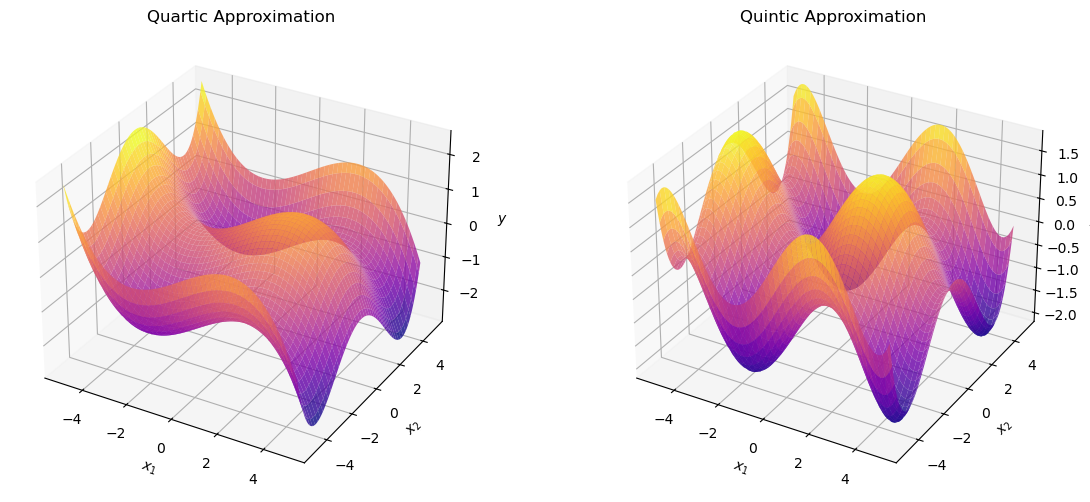

In [37]:
# 6. Compute Y based on the quartic approximation
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)

b0 = 7.65152266e-01 
b1 = 4.11450347e-01 
b2 = 8.94309491e-04
b3 = 1.70315657e-04
b4 = -2.87312108e-01 
b5 = 3.86564284e-04 
b6 = -3.08706812e-02
b7 = -3.01093843e-05
b8 = -1.25790598e-05 
b9 = -2.22983701e-05 
b10 = -5.74109524e-06
b11 = 1.14545782e-02
b12 = -2.95336518e-05 
b13 = -2.12636204e-06 
b14 = 2.72300111e-06

Y_quartic_approx = (
b0 + b1*X1 + b2*X2 + b3*X1**2 + b4*X2**2 + b5*X1*X2 +
b6*X1**3 + b7*X2**3 + b8*X1**2*X2 + b9*X1*X2**2 +
b10*X1**4 + b11*X2**4 + b12*X1**3*X2 + b13*X1**2*X2**2 +
b14*X1*X2**3
)

fig = plt.figure(figsize=(14, 6))

ax7 = fig.add_subplot(121, projection='3d')
ax7.plot_surface(X1, X2, Y_quartic_approx, cmap='plasma', alpha=0.8)
ax7.set_title('Quartic Approximation')
ax7.set_xlabel('$x_1$')
ax7.set_ylabel('$x_2$')
ax7.set_zlabel('$y$')

# 7. Compute Y based on the quintic approximation
b0 = 7.66268166e-01 
b1 = 8.59791535e-01 
b2 = -1.45010231e-05
b3 = -1.97734655e-04
b4 = -2.87585803e-01 
b5 = 1.41810527e-04 
b6 = -1.12998252e-01
b7 = -1.49280457e-06
b8 = -5.91090883e-05 
b9 = 5.34511964e-06 
b10 = 6.78598548e-06
b11 = 1.14739057e-02
b12 = -9.92129434e-06 
b13 = -4.52935816e-06 
b14 = 3.09924436e-06
b15 = 2.89992275e-03
b16 = 1.61436969e-06 
b17 = 3.27898221e-06 
b18 = -1.87262629e-06
b19 = -1.61280362e-06
b20 = 2.93267654e-06

Y_quintic_approx = (
b0 + b1*X1 + b2*X2 + b3*X1**2 + b4*X2**2 + b5*X1*X2 +
b6*X1**3 + b7*X2**3 + b8*X1**2*X2 + b9*X1*X2**2 +
b10*X1**4 + b11*X2**4 + b12*X1**3*X2 + b13*X1**2*X2**2 +
b14*X1*X2**3 +
b15*X1**5 + b16*X2**5 + b17*X1**4*X2 + b18*X1**3*X2**2 +
b19*X1**2*X2**3 + b20*X1*X2**4
)

ax8 = fig.add_subplot(122, projection='3d')
ax8.plot_surface(X1, X2, Y_quintic_approx, cmap='plasma', alpha=0.8)
ax8.set_title('Quintic Approximation')
ax8.set_xlabel('$x_1$')
ax8.set_ylabel('$x_2$')
ax8.set_zlabel('$y$')

plt.show()